In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, confusion_matrix, recall_score, 
                             roc_auc_score, roc_curve, classification_report, 
                             ConfusionMatrixDisplay, RocCurveDisplay)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred_train = clf.predict(X_train)
        clf_report_train = pd.DataFrame(classification_report(y_train, pred_train, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred_train) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report_train}")
        print("_______________________________________________")
        ConfusionMatrixDisplay.from_predictions(y_train, pred_train)
        plt.show()
    else:
        pred_test = clf.predict(X_test)
        clf_report_test = pd.DataFrame(classification_report(y_test, pred_test, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred_test) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report_test}")
        print("_______________________________________________")
        ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
        plt.show()

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('data/train.csv').drop(columns='id', axis =1)

In [3]:
### DROPPING DUPLICATE AND THE NAN VALUE :->
df = df.dropna().drop_duplicates().reset_index(drop =True)

In [4]:
df.shape

(20758, 17)

In [5]:
df.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
numerical_columns   = [col for col in df.columns if df[col].dtype!='O']
categorical_columns = [col for col in df.columns if df[col].dtype=='O']

In [7]:
numerical_columns

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [8]:
multiclass_categorical_feature = {}
binaryClass_categorical_feature = {}
for i in categorical_columns:
    if df[i].nunique()<=2:
        binaryClass_categorical_feature[i] = list(df[i].unique())
        pass
    else:
        multiclass_categorical_feature[i]=list(df[i].unique())

In [9]:
multiclass_categorical_feature

{'CAEC': ['Sometimes', 'Frequently', 'no', 'Always'],
 'CALC': ['Sometimes', 'no', 'Frequently'],
 'MTRANS': ['Public_Transportation',
  'Automobile',
  'Walking',
  'Motorbike',
  'Bike'],
 'NObeyesdad': ['Overweight_Level_II',
  'Normal_Weight',
  'Insufficient_Weight',
  'Obesity_Type_III',
  'Obesity_Type_II',
  'Overweight_Level_I',
  'Obesity_Type_I']}

In [10]:
binaryClass_categorical_feature

{'Gender': ['Male', 'Female'],
 'family_history_with_overweight': ['yes', 'no'],
 'FAVC': ['yes', 'no'],
 'SMOKE': ['no', 'yes'],
 'SCC': ['no', 'yes']}

In [11]:
categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [12]:
categorical_columns_ = [i for i in categorical_columns if i not in "NObeyesdad"]
outpt_columns =   [i for i in categorical_columns if i  in "NObeyesdad"]

In [13]:
outpt_columns

['NObeyesdad']

In [14]:
from sklearn.preprocessing import (OneHotEncoder,StandardScaler, OrdinalEncoder, LabelEncoder)
test = df[outpt_columns]
label_encoder = LabelEncoder()
test['label_encoder'] = label_encoder.fit_transform(df[outpt_columns])

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_1596\3221731373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['label_encoder'] = label_encoder.fit_transform(df[outpt_columns])


In [15]:
test.groupby("NObeyesdad")['label_encoder'].unique()

NObeyesdad
Insufficient_Weight    [0]
Normal_Weight          [1]
Obesity_Type_I         [2]
Obesity_Type_II        [3]
Obesity_Type_III       [4]
Overweight_Level_I     [5]
Overweight_Level_II    [6]
Name: label_encoder, dtype: object

In [16]:
df['NObeyesdad'] = label_encoder.fit_transform(df[outpt_columns])

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
independent_column = df.iloc[:,:-1]
# dependent_column   = df.iloc[:,-1]
dependent_column = df[['NObeyesdad']]

In [18]:
display(independent_column.head(1),
        dependent_column.head(2))

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation


,NObeyesdad
0,6
1,1


In [19]:
from sklearn.preprocessing import (OneHotEncoder,StandardScaler, OrdinalEncoder, LabelEncoder)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer      = OneHotEncoder(handle_unknown="ignore")
ordinal_encoder    =  OrdinalEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ("OneHotEncoder",  oh_transformer, categorical_columns_),
    ("StandardScaler", numeric_transformer, numerical_columns)    
     ])
independent_column = preprocessor.fit_transform(independent_column)

In [20]:
final_df = pd.concat([pd.DataFrame(independent_column), dependent_column], axis=1).reset_index(drop = True)

In [21]:
final_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,NObeyesdad
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,6


In [22]:
x = final_df.iloc[:,:-1]  ## Taking all column all row except  last one(ie -1)
y = final_df.iloc[:,-1]   ## Taking all row of the last column

In [23]:
print(x.shape,y.shape)

(20758, 30) (20758,)


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.23, random_state=42)

In [25]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (15983, 30)
y_train shape (15983,)
x_test shape (4775, 30)
y_test shape (4775,)


In [26]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [27]:
y_pred = model.predict(x_test)
print("PREDICTED DATA : - ", y_pred)
print("ACTUAL DATA : - ", np.array(y_test))

PREDICTED DATA : -  [4 5 2 ... 4 5 2]
ACTUAL DATA : -  [4 5 2 ... 4 5 2]


In [28]:
print("TEST SCORE  " ,model.score(x_test, y_test)*100)
print("TRAIN SCORE ", model.score(x_train, y_train)*100)

TEST SCORE   90.36649214659685
TRAIN SCORE  98.80498029155979


Train Result:
Accuracy Score: 98.80%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1            2       3       4            5  \
precision     0.988660     0.975241     0.993835     1.0     1.0     0.976009   
recall        0.992754     0.983912     0.991217     1.0     1.0     0.957219   
f1-score      0.990702     0.979557     0.992524     1.0     1.0     0.966523   
support    1932.000000  2362.000000  2277.000000  2499.0  3109.0  1870.000000   

                     6  accuracy     macro avg  weighted avg  
precision     0.973292   0.98805      0.986720      0.988053  
recall        0.979835   0.98805      0.986419      0.988050  
f1-score      0.976552   0.98805      0.986551      0.988036  
support    1934.000000   0.98805  15983.000000  15983.000000  
_______________________________________________


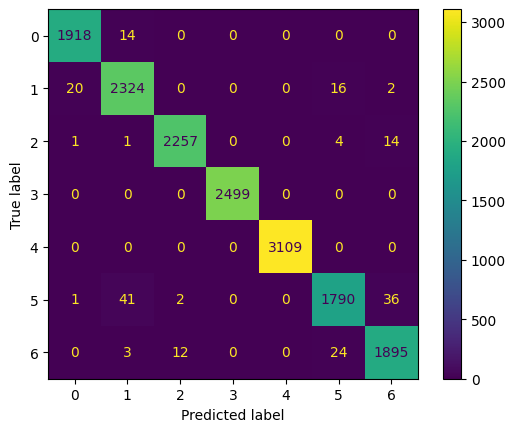

Test Result:
Accuracy Score: 90.37%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3           4  \
precision    0.949653    0.874145    0.892508    0.969496    0.995740   
recall       0.925550    0.887500    0.865719    0.975968    0.997866   
f1-score     0.937446    0.880772    0.878909    0.972721    0.996802   
support    591.000000  720.000000  633.000000  749.000000  937.000000   

                    5           6  accuracy    macro avg  weighted avg  
precision    0.767196    0.808081  0.903665     0.893831      0.904131  
recall       0.780969    0.816327  0.903665     0.892843      0.903665  
f1-score     0.774021    0.812183  0.903665     0.893265      0.903833  
support    557.000000  588.000000  0.903665  4775.000000   4775.000000  
_______________________________________________


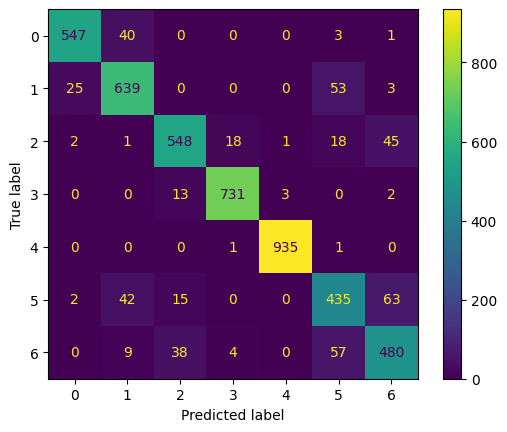

In [29]:
print_score(model, x_train, y_train, x_test, y_test, train=True)
print_score(model, x_train, y_train, x_test, y_test, train=False)

###  Importing the validation data 

In [30]:
validation_data = pd.read_csv("data/test.csv")

In [31]:
validation_data.head(1)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.0,Sometimes,Public_Transportation


In [32]:
df.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,6


In [33]:
## Preprocessing the above data without taking the 
preprocessor_validation_data = preprocessor.transform(validation_data)

In [34]:
preprocessor_validation_data

array([[ 0.        ,  1.        ,  0.        , ...,  1.30858356,
        -0.15072086, -1.02434359],
       [ 1.        ,  0.        ,  0.        , ...,  1.59516474,
         0.02177483, -1.02434359],
       [ 1.        ,  0.        ,  0.        , ...,  0.97371428,
        -1.17114146, -0.60829571],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.0483493 ,
         1.15485445,  0.63651292],
       [ 0.        ,  1.        ,  0.        , ..., -0.0483493 ,
         2.40760742,  2.29736943],
       [ 0.        ,  1.        ,  0.        , ...,  0.29017679,
         0.38476852,  0.02343431]])

In [35]:
validation_data_prediction = model.predict(preprocessor_validation_data)

In [36]:
SampleSubmissionData = pd.read_csv("data/sample_submission.csv")

In [37]:
SampleSubmissionData['validation_data_prediction'] = validation_data_prediction

In [38]:
SampleSubmissionData.head(2)

,id,NObeyesdad,validation_data_prediction
0,20758,Normal_Weight,3
1,20759,Normal_Weight,5


In [39]:
weight_categories = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Obesity_Type_I': 2,
    'Obesity_Type_II': 3,
    'Obesity_Type_III': 4,
    'Overweight_Level_I': 5,
    'Overweight_Level_II': 6
}
reversed_weight_categories = {v:k for k,v in weight_categories.items()}
SampleSubmissionData['validation_data_prediction'] = SampleSubmissionData['validation_data_prediction'].replace(reversed_weight_categories)

In [40]:
SampleSubmissionData.head(1)

,id,NObeyesdad,validation_data_prediction
0,20758,Normal_Weight,Obesity_Type_II


In [41]:
SampleSubmissionData['correct_prediction'] = np.where(SampleSubmissionData['NObeyesdad']==SampleSubmissionData['validation_data_prediction'],True, False)

In [42]:
sum(SampleSubmissionData['correct_prediction'].to_list())/len(SampleSubmissionData)

0.15209537572254336

In [43]:
final_submission = SampleSubmissionData['id		validation_data_prediction'.split()].rename(columns={"validation_data_prediction":"NObeyesdad"})

In [44]:
final_submission.to_csv("submission.csv", index = False)